# Final Project
**Melissa Stone Rogers** 

[GitHub Project Repository](https://github.com/meldstonerogers/datafun-07-ml)



In [47]:
#import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow as pa
import numpy as np
import scipy
import sklearn

## Part 1 - Chart a Straight Line

### Linear Relationship, Plotting Celsius vs Fahrenheit

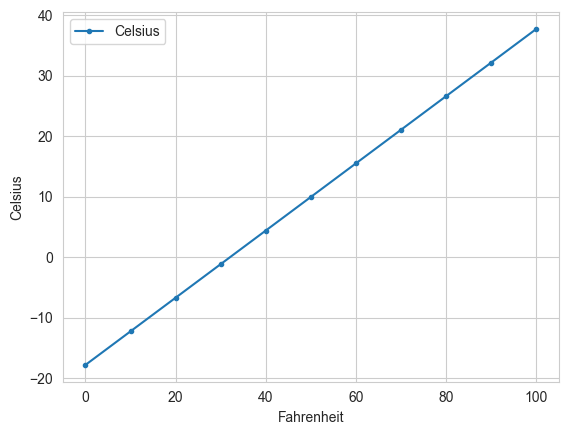

In [48]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
import pandas as pd
import matplotlib.pyplot as plt
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Aquistion 

In [49]:
#load dataset 
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In [50]:
#Get sense of the data
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [51]:
#Get sense of the data
df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [52]:
#improve column name 
df.columns = ['Date', 'Temperature', 'Anomaly']
df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [53]:
#check column type
df.Date.dtype

dtype('int64')

In [54]:
#truncate last two digits
df.Date = df.Date.floordiv(100)

df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [55]:
#Set the precision for floating point numbers, updated from textbook code due to error
pd.set_option('display.precision', 2)

In [56]:
#use descriptive statistics
df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [57]:
from scipy import stats
linear_regression = stats.linregress(x=df.Date, y=df.Temperature)

print(f'Statistics:' , stats.linregress(x=df.Date, y=df.Temperature))


Statistics: LinregressResult(slope=0.014771361132966163, intercept=8.694993233674289, rvalue=0.1169376670075292, pvalue=0.19586679787456207, stderr=0.011357855112603288, intercept_stderr=22.22536216679513)


In [58]:
linear_regression.slope
linear_regression.intercept

print(f'Slope:', linear_regression.slope)
print(f'Intercept:', linear_regression.intercept)


Slope: 0.014771361132966163
Intercept: 8.694993233674289


### Section 6 - Predict

In [59]:
linear_regression.slope*2024+linear_regression.intercept
print(f'Predicted Average Temperature 2024:', linear_regression.slope*2024+linear_regression.intercept)

Predicted Average Temperature 2024: 38.5922281667978


### Section 7 - Visualizations

(10.0, 70.0)

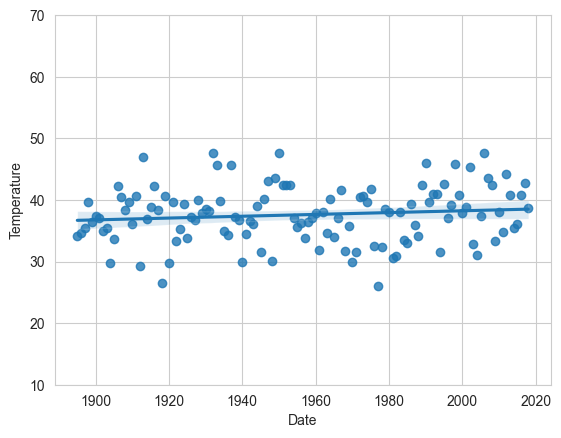

In [60]:
import seaborn as sns
sns.set_style('whitegrid')
axes=sns.regplot(x=df.Date, y=df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [61]:
#use test_train_split to split the data into parts for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Date.values.reshape(-1, 1), df.Temperature.values, random_state=11)

In [63]:
#check the shape of each data set
X_train.shape
X_test.shape

print(f'X_train shape check' , X_train.shape)
print(f'X_test shape check' , X_test.shape)

X_train shape check (93, 1)
X_test shape check (31, 1)


In [64]:
#train the model using Linear Regression Fit
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

In [66]:
#determine coefficient and intercept
linear_regression.coef_
linear_regression.intercept_

print(f'Coefficient:', linear_regression.coef_)
print(f'Intercept:', linear_regression.intercept_)

Coefficient: [0.01939167]
Intercept: -0.30779820252656265


### Section 2 - Test the Model

In [67]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'Predicted: {p:.2f}, Expected: {e:.2f}')

Predicted: 37.86, Expected: 31.70
Predicted: 38.69, Expected: 34.80
Predicted: 37.00, Expected: 39.40
Predicted: 37.25, Expected: 45.70
Predicted: 38.05, Expected: 32.30
Predicted: 37.64, Expected: 33.80
Predicted: 36.94, Expected: 39.70


### Section 3 - Predict 

In [76]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

print(f'Predicted Average Temperature 2024:', predict(2024))

Predicted Average Temperature 2024: [38.94094855]


### Section 3 - Visualizations

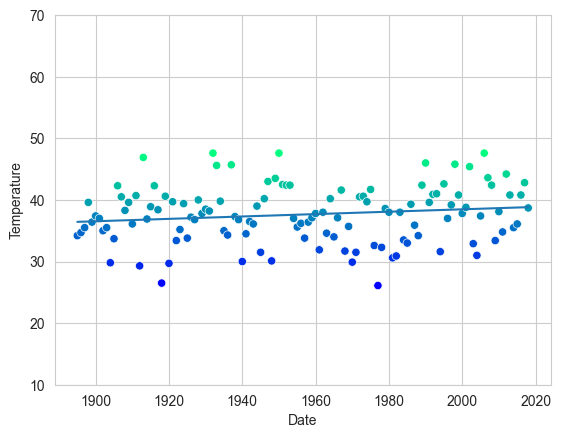

In [78]:
#visualize data with regression line
import seaborn as sns
axes = sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

x = np.array([min(df.Date.values), max(df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Insights

Both methods produced similar visualizations, though the second method may be deemed more aesthetically pleasing, if that is of importance to you. Using typical statistical methods seemed effective for this data set. Machine learning could be particularly beneficial for very large data sets, and it has the possibility of automation, though that was not needed here necessarily. For the purpose of this project, working within both methods was a helpful learning opportunity. 

## Part 5 - Bonus

### Section 1 - Load Data

In [86]:
#load data
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing() 

### Section 2 - Display Data

In [88]:
#description of data
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [89]:
#number of rows and columns 
california.data.shape

(20640, 8)

In [90]:
#target values match array's shape 
california.target.shape

(20640,)

In [92]:
#determine each column name
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Section 3 - Explore Data with Pandas

In [95]:
# Setting precision for floating point numbers
pd.set_option('display.precision', 4)

# Setting the maximum number of columns to display
pd.set_option('display.max_columns', 9)

# Setting the display width to None to avoid truncation
pd.set_option('display.width', None)

In [96]:
#create dataframe using Pandas
california_df = pd.DataFrame(california.data, columns=california.feature_names)

california_df['MedHouseValue'] = pd.Series(california.target)

In [97]:
#get a sense of the data
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


### Section 4 - Descriptive Statistics

In [98]:
#calculate summary statistics
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Section 5 - Visualize the Features

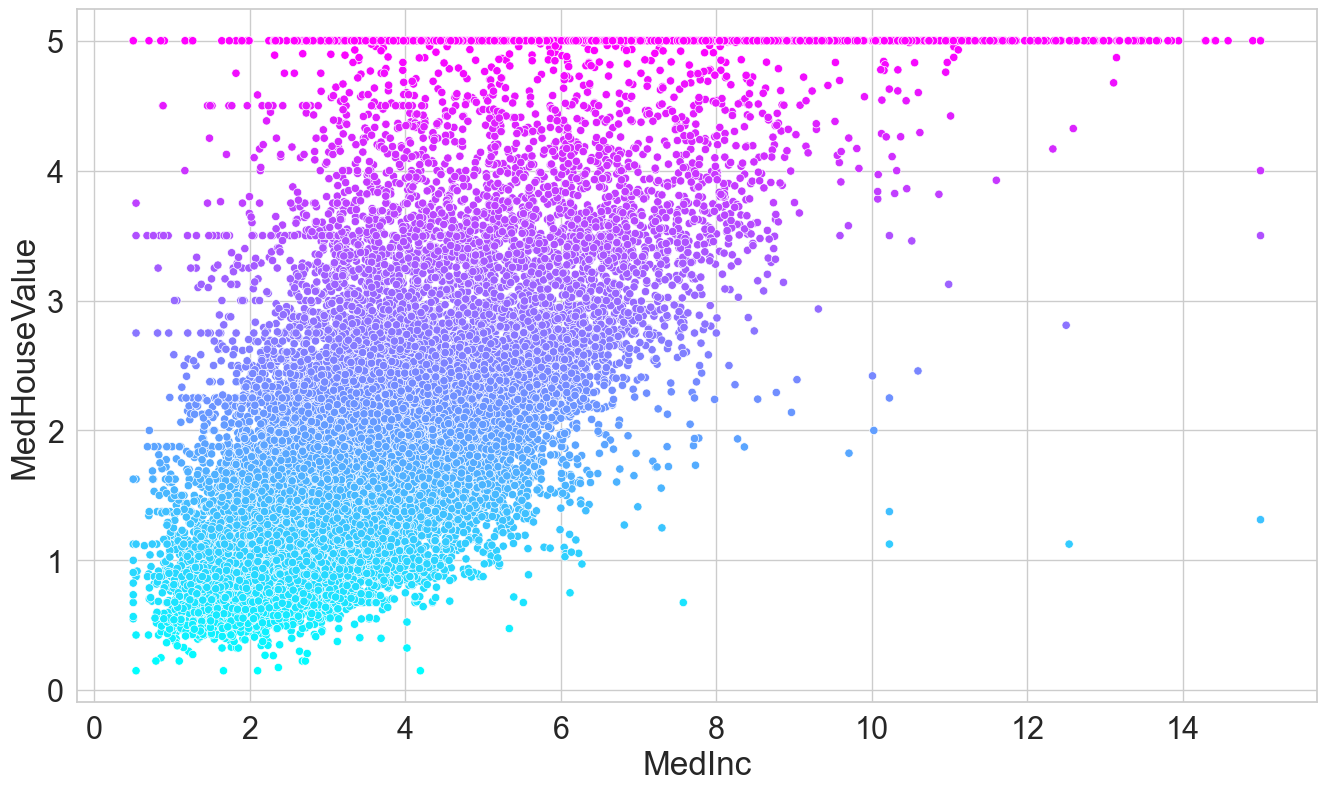

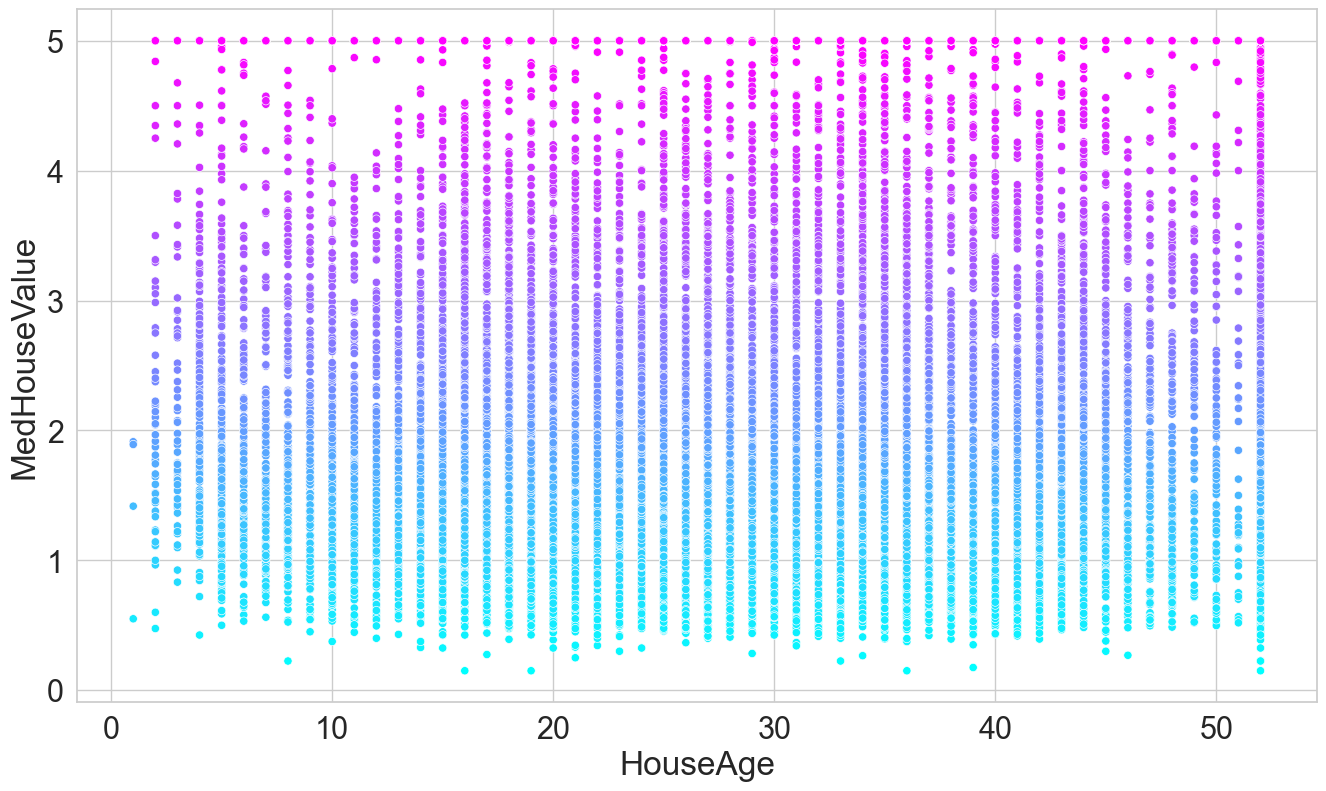

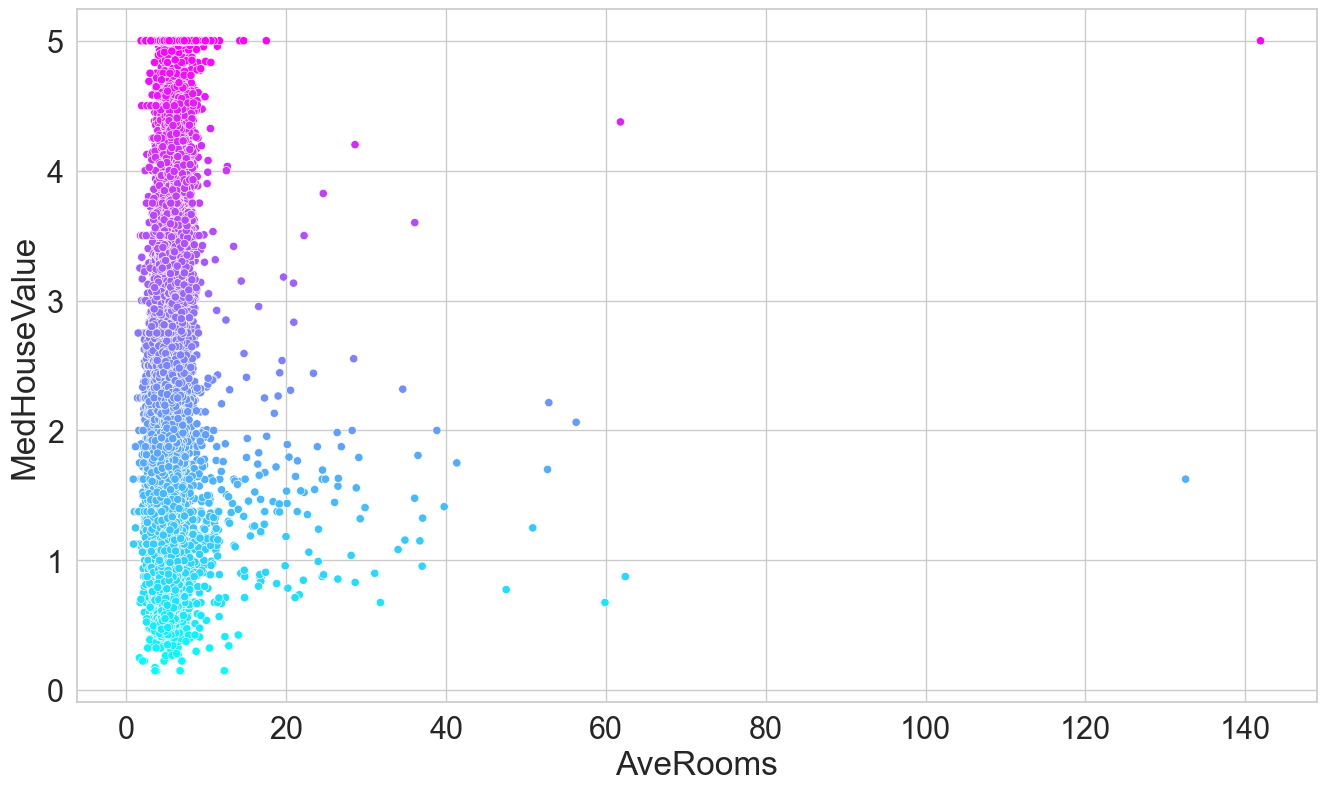

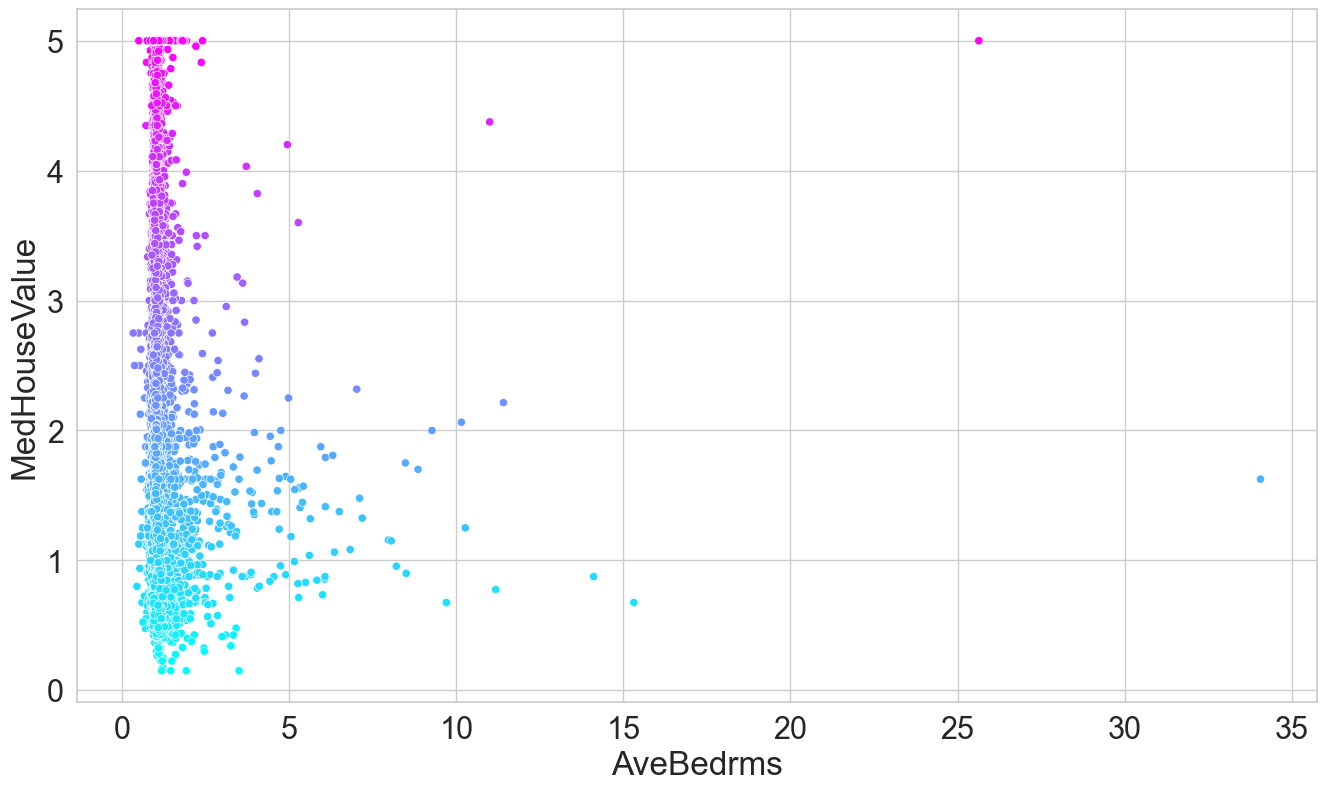

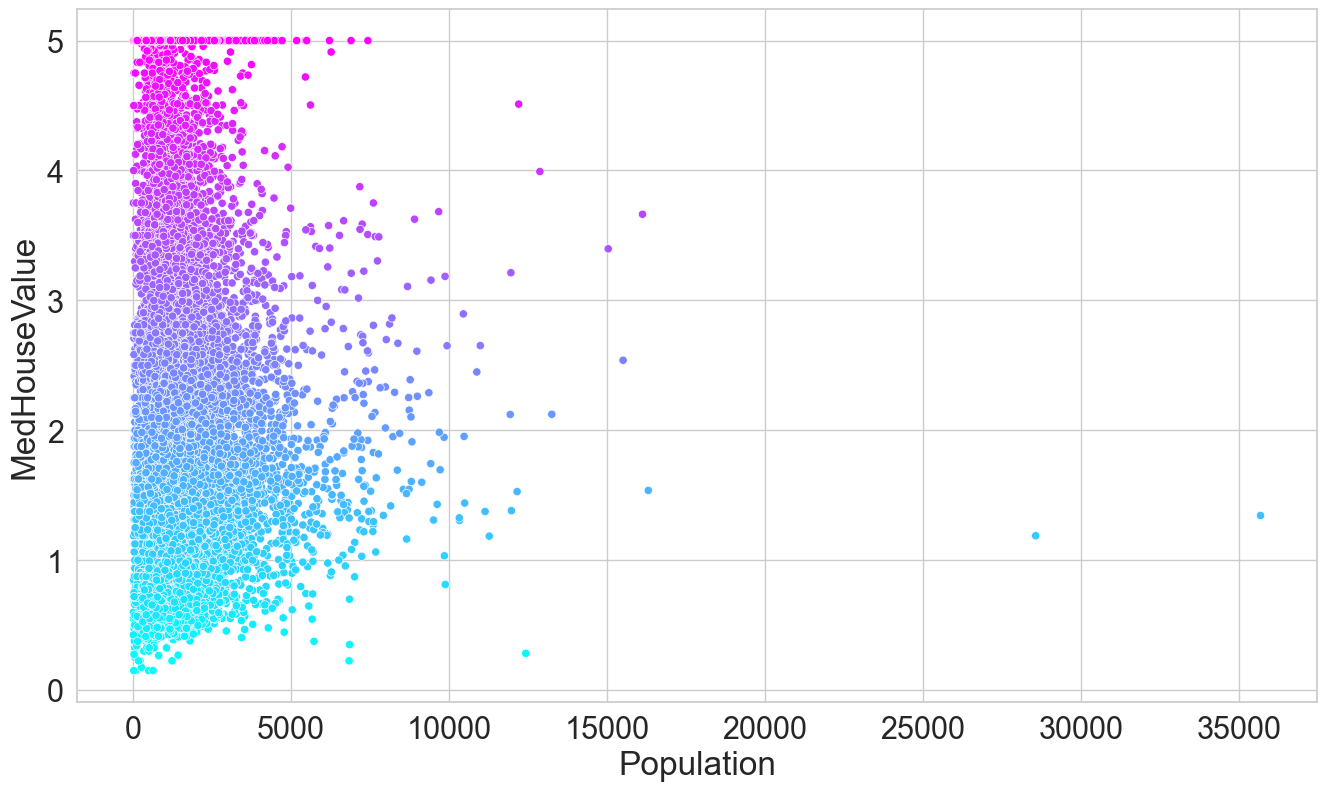

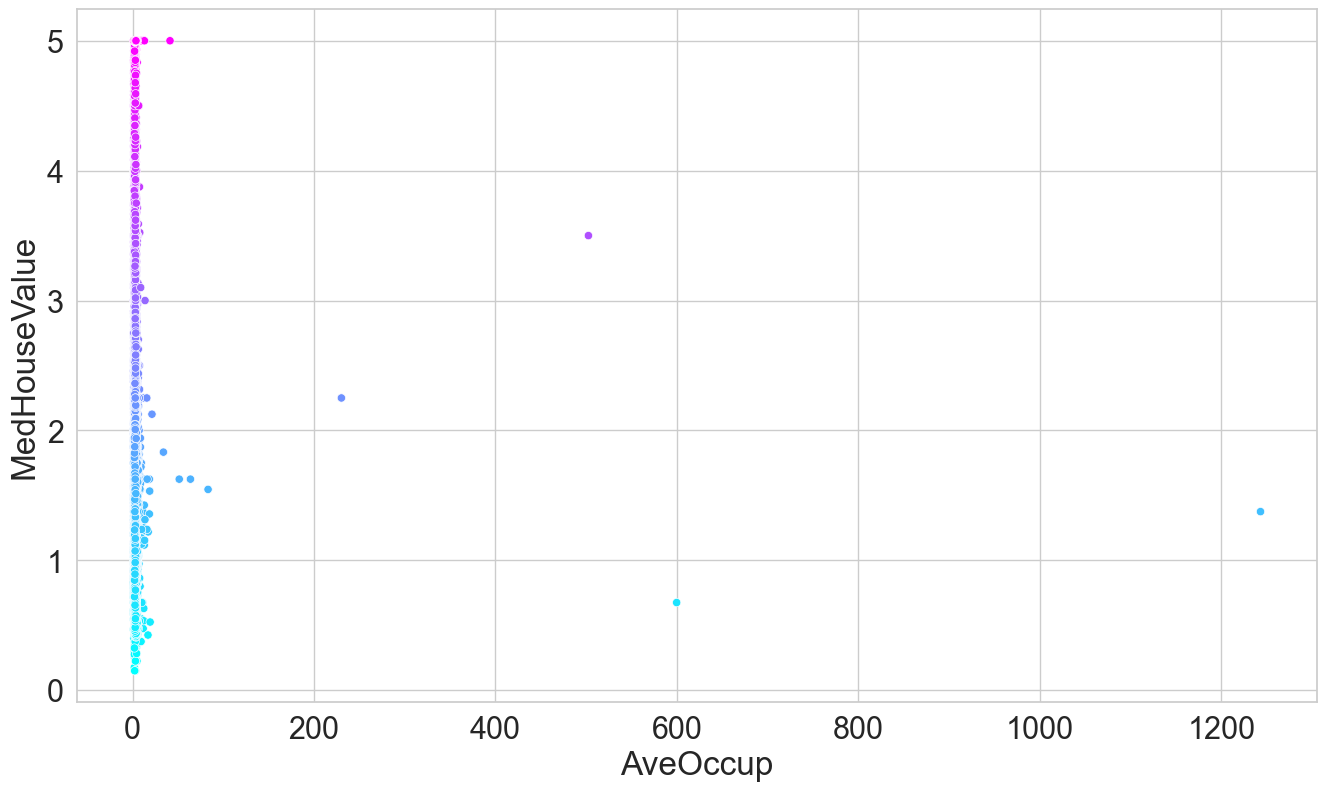

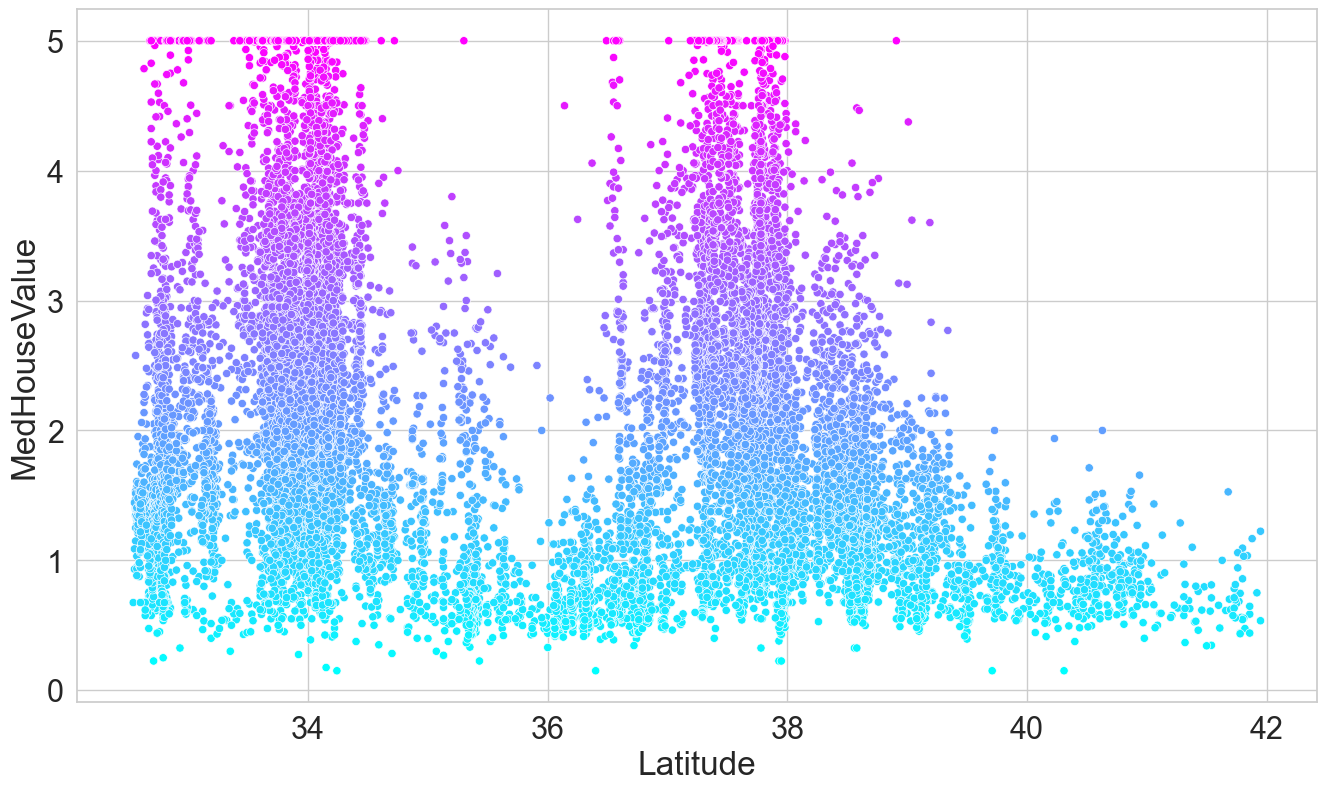

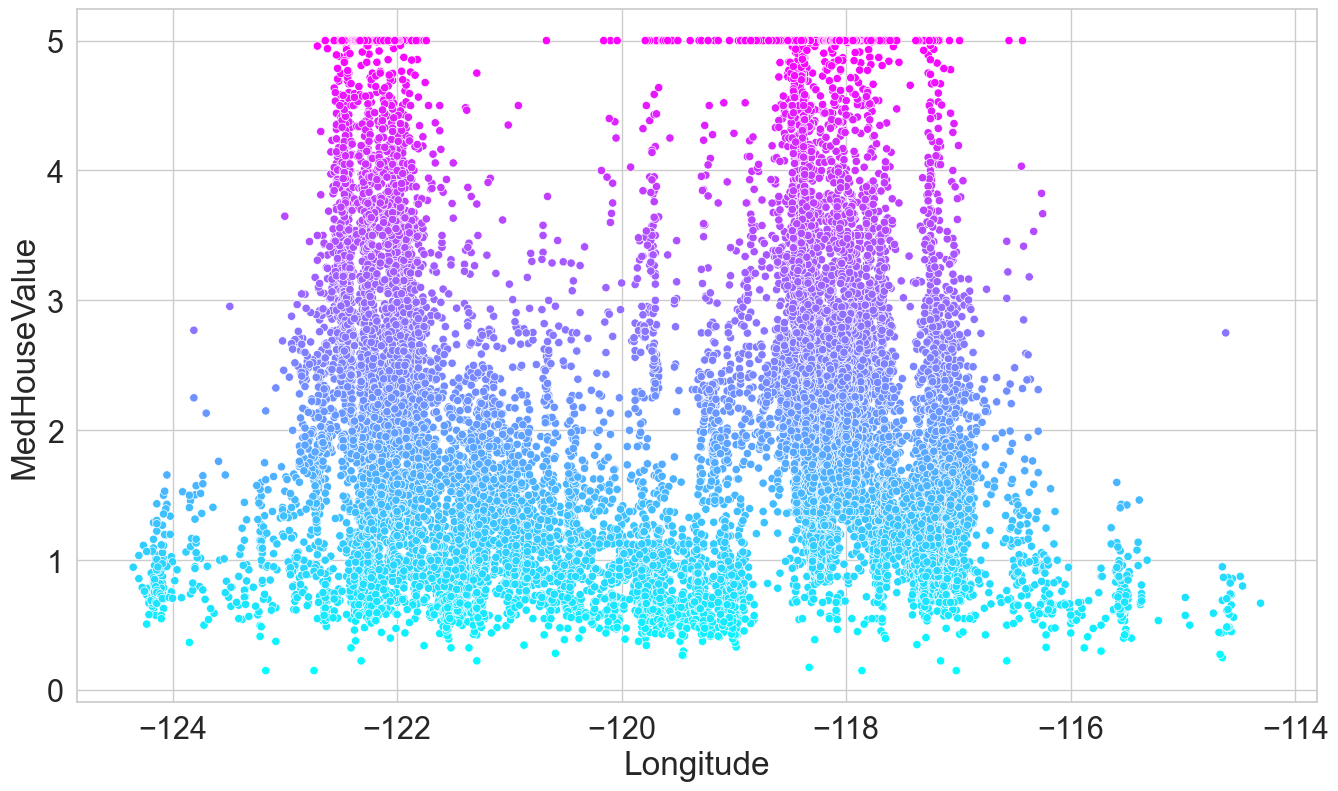

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')
for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=california_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)

### Section 6 - Splitting the Data for Training and Testing

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

X_train.shape
X_test.shape

print(f'X_train shape check' , X_train.shape)
print(f'X_test shape check' , X_test.shape)

X_train shape check (15480, 8)
X_test shape check (5160, 8)


### Section 7 - Training the Model 

In [105]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [106]:
#determine coefficients
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.4377030215382206
  HouseAge: 0.009216834565797749
  AveRooms: -0.10732526637360926
 AveBedrms: 0.6117133073918087
Population: -5.756822009275742e-06
  AveOccup: -0.003384566465716442
  Latitude: -0.4194818609649067
 Longitude: -0.4337713349874023


In [108]:
#determine intercept 
linear_regression.intercept_
print(f'Intercept:', linear_regression.intercept_)

Intercept: -36.8829506560556


### Section 8 - Testing the Model 

In [110]:
predicted = linear_regression.predict(X_test)
expected = y_test

predicted[:5]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339])

In [111]:
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### Section 9 - Visualizing the Expected vs Predicted Prices

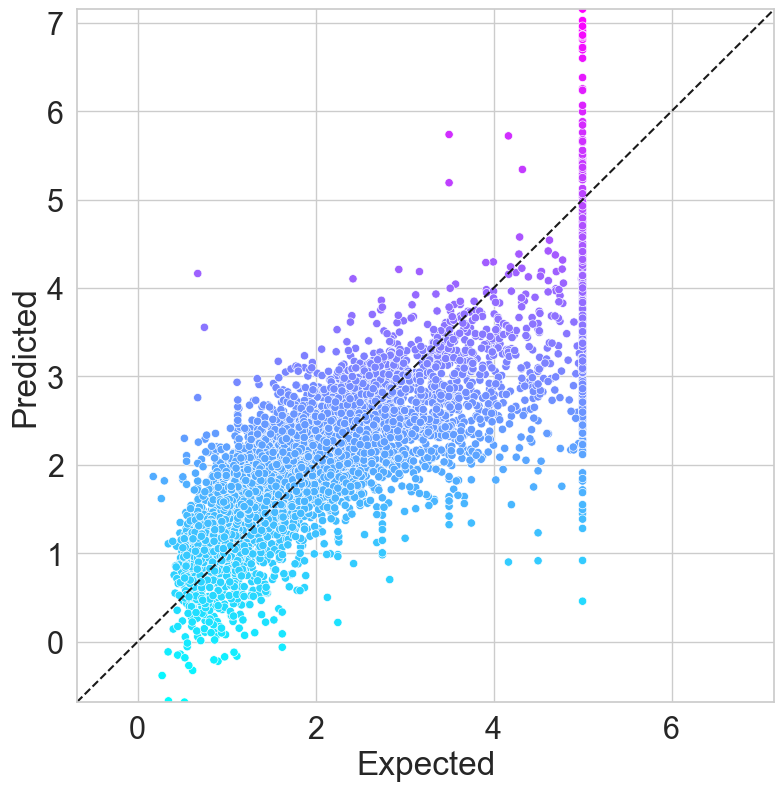

In [112]:
#create data containing columns for expectd and predicted values
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

#plot as scatter plot
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

#specifications of plot
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

#plot line that represents perfect predictions
line = plt.plot([start, end], [start, end], 'k--')


The textbook notes, the model seems to predict lower median house values as the expected median house vlaue increases. 

### Section 10 - Regression Model Metrics

In [113]:
#determine R^2 score
from sklearn import metrics
metrics.r2_score(expected, predicted)

0.6008983115964333

In [114]:
#determine mean squared error
metrics.mean_squared_error(expected, predicted)

0.5350149774449117

### Section 11 - Choosing the Best Model 

In [117]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge 

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [118]:
#run estimators using k-fold cross-validation
#r2 scores closest to 1 are best models for this data 
from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


#### Discussion of Best Model
The R^2 score is a metric for regression estimators. R^2 scores range from 0.0 to 1.0. A score of 1.0 is the best and indicates the estimator can perfectly predict the dependenct variable's value. Both *LinearRegression* and *Ridge* have an R^2 score of 0.599, which is the closest to 1.0 compared to the other estimators. These estimators would be the best to use regarding this data. 

## Final Insights 
Whew- thanks for getting this far! I have learned so much throughout this course and this project has been a great opportunity to bring a lot of the learning together in one place. I am eager to continue my studies and use of skills within data analystics. 